In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import warnings
import logging
from sklearn.model_selection import train_test_split

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [ ]:
!unzip -q /gdrive/MyDrive/ANNDL/Homework2/training_dataset_homework2.zip

{0: 22.852941176470587, 1: 6.317073170731708, 2: 2.8777777777777778, 3: 2.0393700787401574, 4: 12.53225806451613, 5: 5.078431372549019, 6: 2.4824281150159746, 7: 11.426470588235293, 8: 6.475, 9: 1.0, 10: 10.090909090909092, 11: 15.235294117647058}


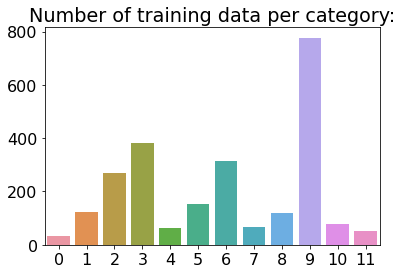

In [ ]:
# Data load

x_data = np.load('x_train.npy')
y_data = np.load('y_train.npy')

# Print the array
# print(x_train.shape)
# print(y_train.shape)
# print(x_train[0])
# print(x_train[1])
# print(y_train)
classes = np.zeros(12)
for x in y_data:
  classes[x] +=1


import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=np.arange(12), y=classes).set_title("Number of training data per category:")
weight = max(classes)/classes
class_weight = {}
for i in range(12):
  class_weight[i] = weight[i]
print(class_weight)

In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
#per window scaler
X_data = x_data
scaler = RobustScaler()
for i in range(len(X_data)):
  tmp = np.reshape(X_data[i],(X_data.shape[1]*X_data.shape[2],1))
  scaler = scaler.fit(tmp)
  tmp = scaler.transform(tmp)
  X_data[i] = np.reshape(tmp, (36,6))


In [ ]:
# single feature scaler

scaler = MinMaxScaler()
X_data = x_data
for i in range(len(x_data)):
  scaler = scaler.fit(x_data[i])
  X_data[i]=scaler.transform(x_data[i])

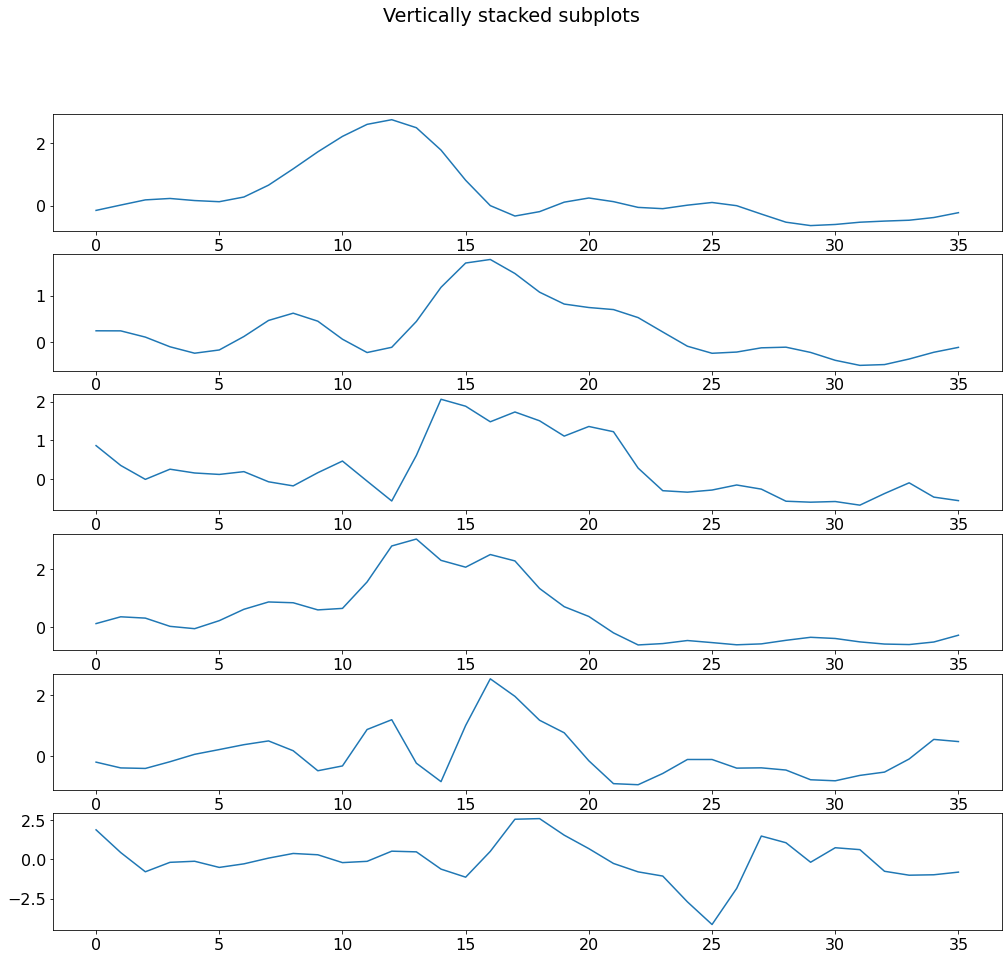

In [ ]:
#print(x_train[1,:,:])
fig, ax = plt.subplots(6, figsize=(17, 15))
fig.suptitle('Vertically stacked subplots')

for i in range(6):
  arr = []
  for x in range(len(y_data)):
    if y_data[x] == 8:
      #print('max'+str(i)+': '+ str(np.max(x_train[x,:,i])))
      arr = np.append(arr,(X_data[x,:,i]))
      break
  ax[i].plot(arr)
  # print('mean: ' + str(np.mean(arr)))
  # print('std: ' + str(np.std(arr)))

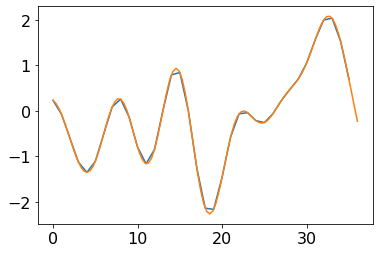

In [ ]:
import numpy as np
from scipy.interpolate import splrep, splev

# Dati da interpolare
# Crea la spline cubica
spline = splrep(np.arange(len(X_data[0,:,0])),X_data[0,:,0])

# Valori di x in cui calcolare la spline
x_interp = np.linspace(0, len(X_data[0,:,0]), 100)

# Calcola la spline in quei valori di x
y_interp = splev(x_interp, spline)

plt.plot(X_data[0,:,0])
plt.plot(x_interp,y_interp)

In [ ]:

interDim = 80
print(X_data.shape)

newXdata =np.empty(interDim*len(X_data)*6)
newXdata = newXdata.reshape((len(X_data),interDim,6))
print(newXdata.shape)
x_interp = np.linspace(0, 36, interDim)
for x in range(len(X_data)):
  for i in range(6):
    spline = splrep(np.arange(len(X_data[x,:,i])),X_data[x,:,i])
    newXdata[x,:,i] = splev(x_interp, spline)
print(newXdata.shape)

(2429, 36, 6)
(2429, 80, 6)
(2429, 80, 6)


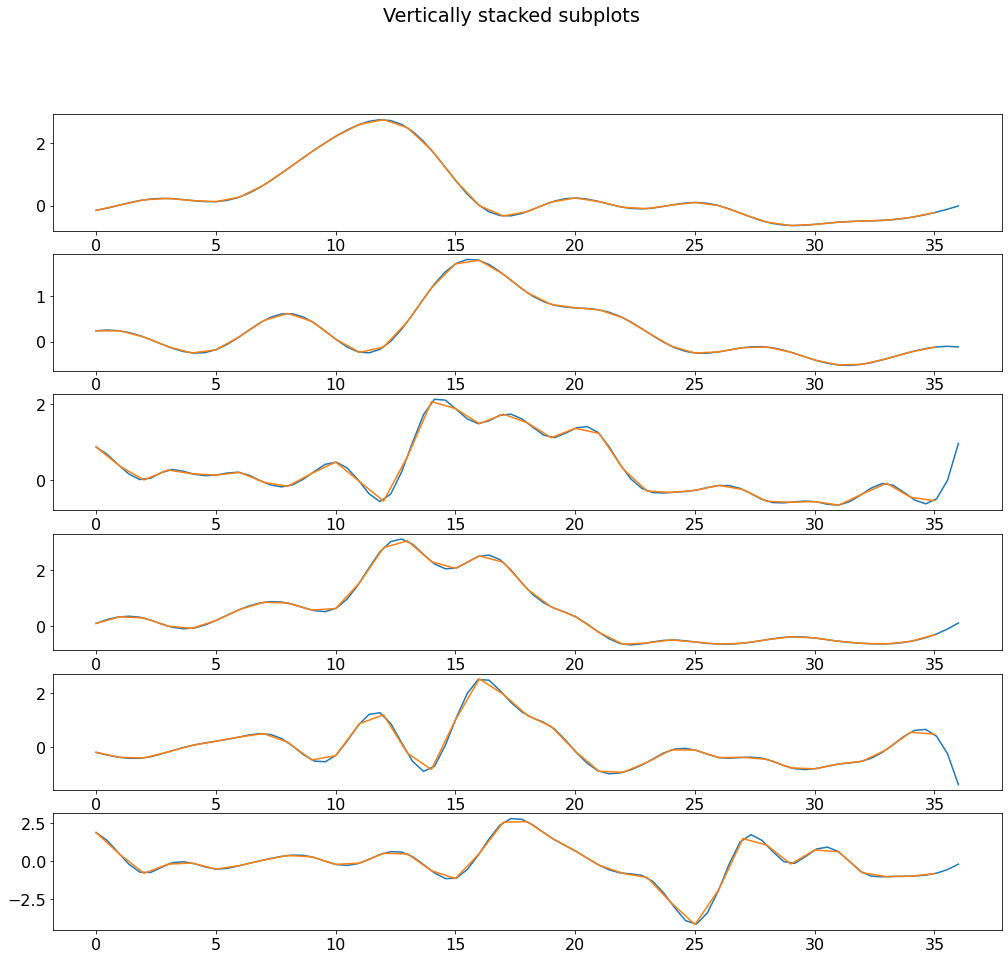

In [ ]:
fig, ax = plt.subplots(6, figsize=(17, 15))
fig.suptitle('Vertically stacked subplots')

for i in range(6):
  for x in range(len(y_data)):
    if y_data[x] == 8:
      x_interp = np.linspace(0, len(X_data[x,:,i]), interDim)
      ax[i].plot(x_interp,newXdata[x,:,i])
      ax[i].plot(X_data[x,:,i])
      break

In [ ]:
Y_data = tfk.utils.to_categorical(y_data)
X_data.shape, Y_data.shape

x_train, x_val, Y_train, Y_val = train_test_split(X_data, y_data, test_size=0.2, shuffle= True,stratify= Y_data)

(1943,)
(1943, 36, 6)
(2943,)
(2943, 36, 6)
{0: 2.321033210332103, 1: 4.084415584415584, 2: 2.5569105691056913, 3: 1.941358024691358, 4: 4.193333333333333, 5: 3.5942857142857143, 6: 2.2544802867383513, 7: 3.4751381215469612, 8: 3.906832298136646, 9: 1.0, 10: 4.084415584415584, 11: 2.872146118721461}


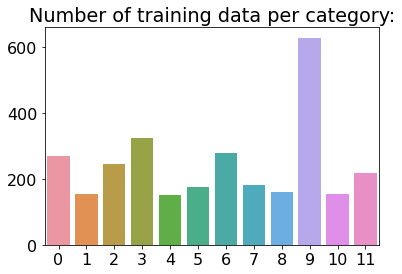

In [ ]:
def getRandomDataOfClass(x,max):
  i = random.randint(0,max)
  while(Y_train[i]!=x):
    i=random.randint(0,max)
  return i



numberToAdd = 1000
print(Y_train.shape)
print(x_train.shape)
for _ in range(numberToAdd):
  sel = random.choices(np.arange(12),weights=list(class_weight.values()))[0]
  sel = getRandomDataOfClass(sel,len(x_train)-1)
  temp = x_train[sel]
  start=random.randint(3,len(temp)-4)
  temp[start:] = x_train[getRandomDataOfClass(Y_train[sel],len(x_train)-1),start:]
  temp = temp.reshape(1,36,6)
  x_train = np.concatenate([x_train,temp])
  Y_train = np.append(Y_train,Y_train[sel])
print(Y_train.shape)
print(x_train.shape)

clax = np.zeros(12)
for x in Y_train:
  clax[x] +=1


import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=np.arange(12), y=clax).set_title("Number of training data per category:")
weight = max(clax)/clax
for i in range(12):
  class_weight[i] = weight[i]
print(class_weight)

In [ ]:
y_train = tfk.utils.to_categorical(Y_train)
y_val = tfk.utils.to_categorical(Y_val)
input_shape = x_train.shape[1:]
classes = y_train.shape[-1]
batch_size = 128
epochs = 200

#### 1D Convolutional Neural Network

![](https://drive.google.com/uc?export=view&id=10B7c-F58-eNr6CP7D_UZeVp0gTeYMrFQ
)

In [ ]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(512,6,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Dropout(.5, seed=seed)(cnn)
    cnn = tfkl.Conv1D(512,6,padding='same',activation='relu')(cnn)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Dropout(.6, seed=seed)(cnn)
    cnn = tfkl.Conv1D(256,3,padding='same',activation='relu')(cnn)
    cnn = tfkl.GlobalAveragePooling1D()(cnn)

    cnn = tfkl.Dropout(.7, seed=seed)(cnn)

    

    # Classifier
    classifier = tfkl.Dense(128, activation='leaky_relu')(cnn)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

model = build_1DCNN_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 conv1d_15 (Conv1D)          (None, 36, 512)           18944     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 18, 512)          0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 18, 512)           0         
                                                                 
 conv1d_16 (Conv1D)          (None, 18, 512)           1573376   
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 9, 512)           0         
 g1D)                                                        

In [ ]:
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    shuffle = True,
    #class_weight = class_weight,
    validation_data=(x_val,y_val),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=50, restore_best_weights=True),
    ]
).history

Epoch 1/200
16/16 [==============================] - 1s 36ms/step - loss: 2.6989 - accuracy: 0.2635 - val_loss: 2.1682 - val_accuracy: 0.3951
Epoch 2/200
16/16 [==============================] - 0s 15ms/step - loss: 2.1069 - accuracy: 0.3459 - val_loss: 1.9392 - val_accuracy: 0.4506
Epoch 3/200
16/16 [==============================] - 0s 15ms/step - loss: 1.9733 - accuracy: 0.3829 - val_loss: 1.8271 - val_accuracy: 0.4691
Epoch 4/200
16/16 [==============================] - 0s 15ms/step - loss: 1.8161 - accuracy: 0.4354 - val_loss: 1.6577 - val_accuracy: 0.5206
Epoch 5/200
16/16 [==============================] - 0s 15ms/step - loss: 1.7362 - accuracy: 0.4601 - val_loss: 1.5292 - val_accuracy: 0.5391
Epoch 6/200
16/16 [==============================] - 0s 15ms/step - loss: 1.6642 - accuracy: 0.4720 - val_loss: 1.5023 - val_accuracy: 0.5247
Epoch 7/200
16/16 [==============================] - 0s 15ms/step - loss: 1.5865 - accuracy: 0.4884 - val_loss: 1.4301 - val_accuracy: 0.5658
Epoch 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=-1)
print(predicted_classes)
pp = np.argmax(y_val, axis=-1)
import sklearn.metrics
print(sklearn.metrics.classification_report(pp, predicted_classes,output_dict = False))

16/16 [==============================] - 0s 4ms/step
[ 9  9  2  6  9  8  2  6  9  6  9  6  9  9  9  3  9  2  9  7  9  6  9  9
  6  2  9  6  2  6  5  2  6 10  9  6  5  9  2  9  3  9  9  3  3  8  9  2
  2  9  9  2  1  9  9  3  1  5  3  3  8  0  6  2  6  3  9  3 10  2  3  5
  3  6  6  9  2  9  9  9  9  2 10  3  6  4  3  9  6  9 10  6  9  9  6  9
  9  3  9  9  2  2  6  2  8  9  3  2  9  6  2  9  3  9 11  9  1  7  9  9
  3  2  2  3  3  1  1  8  9  6  3  9  9  9  2  9  6  2  9  9  5  3  3  3
  2  9  5  9  3  6  3  1  3  1 11  9  9  1  9  5  3  9  6  6  8  6  3 11
  9  9 10  9  5  9  9  6  3  6  9  9  6  9  9  3  3  3  5  5  2  6  9  3
  3  8  3  9  3  3  9  1  6  1  9  2 11  9  9  2  5  6  6  9  3  9  9  2
  3  6  3  9  9  3  1  9  9  9  6  2  2  3  9  9  2  6  3 10  3  2  1  9
  9  9  9  2  9  6  9  9  9  2  5  8  3 10  9  6  8  9  9  6  9  9  8  2
  9  3  8  6  3  9  9  9  1  3 11  9  9  6  2  6  6 10  9  5  9  6  8  9
  3  6  6  9 10  9  9  9  9  3  2  2  9  9  1  3  8 10  6 11  9  9  9  

In [ ]:
model.save('/gdrive/MyDrive/ANNDL/Homework2/models/1Dconv60_weight')
# model = tfk.models.load_model('1DCNN')